### A&B Testing in Python ⏰

Key takeaway: is to understand whether a **change** company's user interface have any significance on the conversion rate of users. 

<b>Conversion 0: User does not convert. <br>
Conversion 1: User does convert.</b>

---


The **null hypothesis**, or H0, would be that the conversion is purely by chance, and does not have any significance to the conversion rates. 

Our main objective is to then decline / refute the null hypothesis, and accept the **alternate hypothesis**, or Ha, that means its not purely by chance, and that the company's change in the user interface does cause the higher conversion rates, or lower. 

## Acquisition and Imports

In [2]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss 

In [126]:
# Data acquisition (From Luyuan Zhang, A/B testing)
df = pd.read_csv("/content/drive/MyDrive/ABdata/ab_data.csv")

In [4]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB




```
Do note that there are 294478 data entries in this dataset.
From index range [0, 294477]
```



In [5]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [155]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,0,143293
treatment,143397,0


The treatment group (also called the experimental group) receives the treatment whose effect the researcher is interested in. The control group receives either no treatment, a standard treatment whose effect is already known, or a placebo (a fake treatment) - Thomas, 2021

```
From the code above, it is shown that which treatment group
"control" or "treatment", are shown which type of landing page.

Whether it be the old, or new one.

The control group is faces more of the old page, compared to the treatment group, which were shown with the new page.
```



In [11]:
# Checking whether all of the users observed are unique
df[df['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,treatment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,treatment,old_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


In [127]:
df_copy = df.copy()

Turns out there are **3894** duplicated users observed. 

To avoid bias, we remove these duplicates.

## Cleaning 

In [128]:
# First approach, removing the numbers that got duplicated, not keeping any if its duplicated.

users_to_drop = df[df['user_id'].duplicated()]

In [129]:
users_to_drop.shape

(3894, 5)

In [130]:
users_to_drop['user_id'].isin([643869])

2656      False
2893      False
7500      False
8036      False
10218     False
          ...  
294308    False
294309    False
294328    False
294331    False
294355    False
Name: user_id, Length: 3894, dtype: bool

In [131]:
users_to_drop

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,treatment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,treatment,old_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


##### Cross checking methods

In [132]:
count_occ = df_copy['user_id'].value_counts(ascending = False)

In [133]:
count_occ = count_occ[count_occ > 1]

In [134]:
print(899953 in count_occ)

True


In [135]:
users_to_drop = users_to_drop['user_id']

In [136]:
df = df[~df['user_id'].isin(users_to_drop)]

In [137]:
df.shape

(286690, 5)

**The logic behind the first approach:**


 The *count* length of the User IDs that got duplicated is 3894, but since these occurences happen twice per each of the User IDs, mentioned so we will remove 3894 x 2 (Including the original User IDs first occurence)




In [138]:
# Second approach, removing the duplicates, but only keeping the first occurence of the duplicate

df_copy_duplicated = df_copy[df_copy['user_id'].duplicated()]

In [139]:
df_copy_duplicated.shape

(3894, 5)

In [142]:
df_copy = df_copy.drop_duplicates(subset=['user_id'], keep='first')

In [143]:
df_copy.shape

(290584, 5)

**The logic behind the second approach:**


 The *count* length of the User IDs that got duplicated is 3894, but since these occurences happen twice per each of the User IDs, and the second approach is dropping duplicated **but** keeping their first occurences, hence only 3984 is dropped instead of twice the value, like first run.




```
Hence at the end of the day whether you want to use more sample data with:

1. df = 286.690 # All duplicates even first occurence, removed
2. df_copy = 290.584 # All duplicates removed, but first occurence kept

My advice, better use df instead, because we'd much rather 
have users that were tested once instead of various times, 
and we don't know which one is more genuine to take, 
the first occurence, or the last.

Hence better remove those that got duplicated, even the first occurence.
```



## Sampling

Firstly, we need to know how much of the required n value should we need for the samples. 

Effect size — How big of a difference we expect there to be between the conversion rates

For example our team would be happy with a difference of 2%, we can use 18% and 20% to calculate the effect size we expect.

**Note**: This is usually decided by the stakeholders or the company.

In [150]:
# Packages imports
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil

%matplotlib inline

# Some plot styling preferences
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
effect_size = sms.proportion_effectsize(0.18, 0.20)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

6036


In [151]:
control_sample = df[df['group'] == 'control'].sample(n=required_n, random_state=24)
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n, random_state=24)

ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
ab_test

,user_id,timestamp,group,landing_page,converted
0,803552,2017-01-11 03:29:19.204888,control,old_page,0
1,873056,2017-01-16 08:15:07.514286,control,old_page,0
2,910537,2017-01-04 02:22:03.820979,control,old_page,0
3,742293,2017-01-19 04:11:16.325587,control,old_page,0
4,706642,2017-01-08 04:31:55.179279,control,old_page,0
...,...,...,...,...,...
12067,847651,2017-01-06 22:23:47.881569,treatment,new_page,1
12068,641074,2017-01-23 21:45:41.901720,treatment,new_page,1
12069,744148,2017-01-20 13:01:36.829002,treatment,new_page,0
12070,728295,2017-01-19 11:39:20.367825,treatment,new_page,0


In [153]:
ab_test['group'].value_counts()

treatment    6036
control      6036
Name: group, dtype: int64

## Visualizing Results

In [154]:
conversion_rates = ab_test.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.115,0.319,0.004
treatment,0.119,0.324,0.004


Judging by the stats above, it does look like our two designs performed very similarly, with our new design performing slightly better, approx. 11.5% vs. 11.9% conversion rate.

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


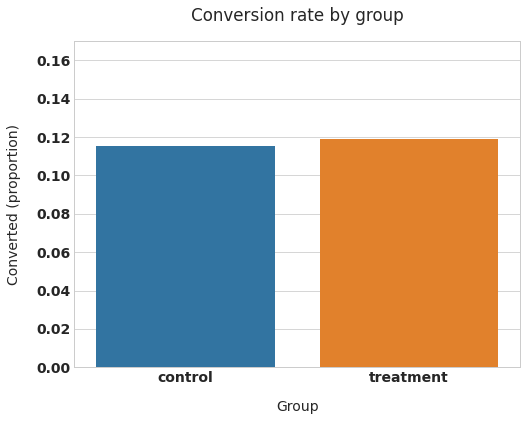

In [156]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

So… the treatment group's value is higher. Is this difference statistically significant?

## Hypothesis testing

In [157]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.65
p-value: 0.515
ci 95% for control group: [0.107, 0.123]
ci 95% for treatment group: [0.111, 0.127]


**Analyzing results** 

Since our p-value=0.515 is way above our α=0.05 threshold, we cannot reject the Null hypothesis Hₒ, which means that our new design did not perform significantly different, better or worse, than the old one.

Additionally, if we look at the confidence interval for the treatment group ([0.111, 0.127], or 11.1-12.7%) we notice that:
It does not include our baseline value of 18%% conversion rate, nor does it include our target value of 20% (the 2% uplift we were aiming for)

What this might mean is that:



1.   The actual conversion rates are actually lower than expected 18%-20%. Hence, the actual conversion rates are perhaps 11-12%
2.   The uplift of the 2% is also not achieveable based on the data; because roughly 10.7% to 11.1% / 12.3% to 12.7% is only a 0.4% increase in conversion rate. 
3.    The numbers of the confidence interval showss that the new design of the UI is not likely to improve the conversion rates. 


Also, some suggestions will be trying ads and marketing to increase the conversion rates as a whole (outside of the A/B testing scheme and reach it into a higher threshold of >2%). Take periodical goals for the conversion rates, perhaps an increase of 2% this Q1, 4% the next Q2, and so on. 

Furthermore, we can try readjusting the parameters in the A/B testing to match the actual rates 11-12% but the results will still show us the same insights. 